In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn import metrics
import time
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [14]:
ds = pd.read_csv('D:/3Kurs/1Sem/SS/rgr/Data/Life_Expectancy_Data_fixed_scaled.csv')

In [3]:
ds.head()

,Unnamed: 0,Year,Life_expectancy,Adult_Mortality,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,...,Thinness_five_nine_years,Income_composition_of_resources,Schooling,Region_Africa,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America,Status_Developed
0,0,2015,65.0,263.0,0.01,0.052565,65.0,16,19.1,3.5,...,17.3,0.479,10.1,0,1,0,0,0,0,0
1,1,2014,59.9,271.0,0.01,0.054220,62.0,492,18.6,3.5,...,17.5,0.476,10.0,0,1,0,0,0,0,0
2,2,2013,59.9,268.0,0.01,0.053996,64.0,430,18.1,3.5,...,17.7,0.470,9.9,0,1,0,0,0,0,0
3,3,2012,59.5,272.0,0.01,0.057657,67.0,16,17.6,3.5,...,18.0,0.463,9.8,0,1,0,0,0,0,0
4,4,2011,59.2,275.0,0.01,0.005234,68.0,16,17.2,3.5,...,18.2,0.454,9.5,0,1,0,0,0,0,0


In [4]:
X = ds.drop(['Life_expectancy'], axis=1)
y= ds['Life_expectancy']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
lm = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)

algo = [xgbt,lm,ridge,lasso,knn,rf,dtree]

result = []

for i in algo:
        start = time.process_time()
        ml_model = i.fit(X_train,y_train)
        result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train), ml_model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                  mean_absolute_error(y_train, ml_model.predict(X_train)),
                  mean_absolute_error(y_test, ml_model.predict(X_test))])
        print(str(i).split("(")[0],"✓    ", "{}".format(round(time.process_time()-start,3)),"sec")

result = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index("Algorithm")
result

XGBRegressor ✓     1.703 sec
LinearRegression ✓     0.625 sec
Ridge ✓     0.0 sec
Lasso ✓     0.0 sec
KNeighborsRegressor ✓     0.234 sec
RandomForestRegressor ✓     3.188 sec
DecisionTreeRegressor ✓     0.109 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae
Algorithm,,,,,,
XGBRegressor_baseline,0.999278,0.944691,2.497110e-01,2.267758,1.754227e-01,1.264259
RandomForestRegressor_baseline,0.992898,0.942254,7.830610e-01,2.317168,4.367083e-01,1.267439
DecisionTreeRegressor_baseline,1.000000,0.886915,3.648209e-16,3.242652,1.873136e-17,1.719825
Ridge_baseline,0.794962,0.803464,4.207372e+00,4.274821,3.073517e+00,3.175835
LinearRegression_baseline,0.794970,0.803389,4.207287e+00,4.275646,3.073430e+00,3.177084
Lasso_baseline,0.713733,0.706794,4.971408e+00,5.221366,3.521795e+00,3.711650
KNeighborsRegressor_baseline,0.848905,0.668682,3.611762e+00,5.550344,2.045026e+00,3.060070


There are three metrics to chosse the best model for my data set: Score, RMSE and MAE.

Score measures how much of the variation in the dependent variable is explained by the independent variables, so I need to find the highest test score.

RMSE Measures the average error of the model's predictions. This is the average of the squared difference between the actual and predicted values, so I need to find the lowest test RMSE.

MAE Measures the average absolute error between actual and predicted values, so I need to lowest the highest test MAE.

### So I chose the XGBRegressor model because it met all my requirements.

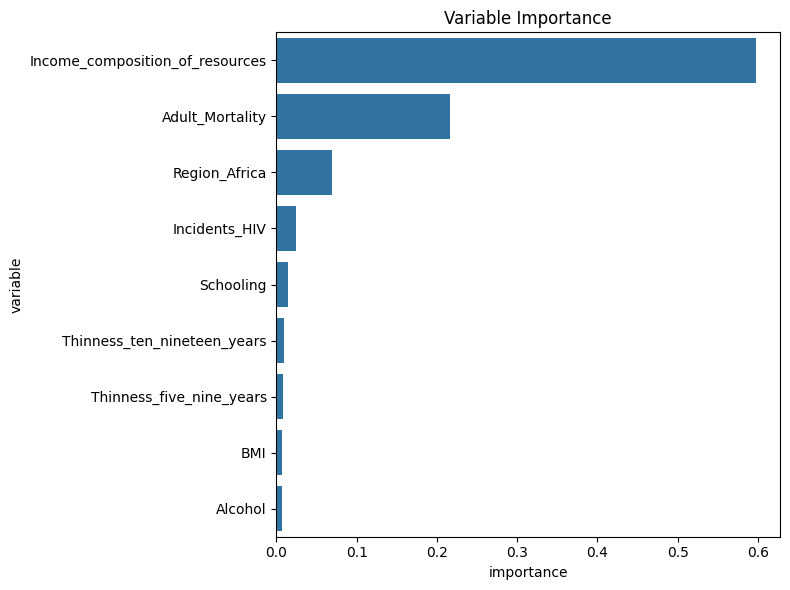

In [7]:
rankings = ml_model.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),reverse=True),columns=["variable","importance"]).sort_values("importance",ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="variable",
            data=importance[:9])
plt.title('Variable Importance')
plt.tight_layout()